In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import math

# 365 DataScience RE California Database
**Task 1:** What are the types of data and the levels of measurement of the following variables: Cust ID, Mortgage, Year of sale.

In [2]:
data = pd.read_csv('ex2-13.csv').rename(columns={'Y': 'Year', 'M': 'Month', 'D': 'Day'}).astype({'ID': 'string'})
data['Price'] = data['Price'].str.replace('£', '').str.replace(',', '').str.strip()
data['Price'] = data['Price'].astype('float')
data.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status,Customer ID,...,Year,Month,Day,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005.0,11.0,Apartment,30,743.09,246172.68,Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5.0,No,Website
1,1029,1,2005.0,10.0,Apartment,29,756.21,246331.90,Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5.0,No,Website
2,2002,2,2007.0,7.0,Apartment,2,587.28,209280.91,Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1.0,Yes,Client
3,2031,2,2007.0,12.0,Apartment,31,1604.75,452667.01,Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3.0,Yes,Website
4,1049,1,2004.0,11.0,Apartment,49,1375.45,467083.31,Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4.0,No,Agency


**Customer ID:** Categorical, Nominal  
**Mortgage:** Categogical, Nominal (Binary)  
**Year of Sale:** Numerical, Discrete - Interval  

**Task 2:** Create a frequency distribution graph representing the price (that is a histogram with the highest possible number of bins - 272). Use data on all apartments and offices, no matter if sold or not.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf8c517850>]],
      dtype=object)

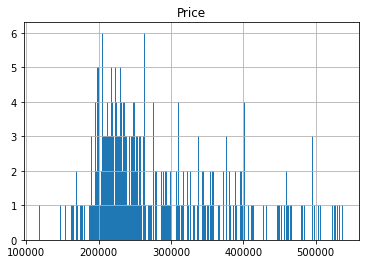

In [3]:
data.hist(column='Price', bins=272)

**Task 3:** Create a histogram which represents the Price variable. Choose interval width (bins) of length $100,000.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf84134650>]],
      dtype=object)

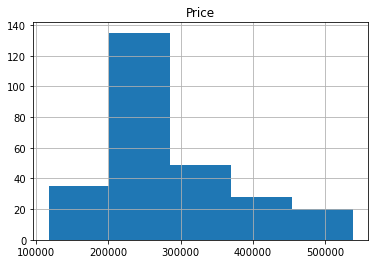

In [4]:
bins = math.ceil((data['Price'].max() - data['Price'].min()) / 100000)
data.hist(column='Price', bins=bins)

**Task 4:** Interpret the results.

The majority of property prices are within the 200k - 300k price bracket. What this doesn't show is who is buying properties for these prices.

**Task 5:** Create a scatter plot showing the relationship between Price and Area. Use the data on all properties, no matter if sold or not. Interpret the results.

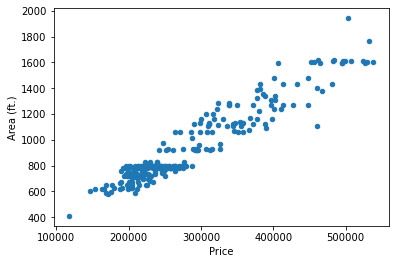

In [5]:
data.plot.scatter(x='Price', y='Area (ft.)')

_Interpretation:_ There is a clear positive trend between the price and the area. We can also see a cluster at the low area/price range that indicates a lot of properties have a smaller price and, therefore, area. This correlates to the previous histogram, with the majority of properties in the same band.

**Task 6:** Create a frequency distribution table, where you list all the countries from which the company has buyers (country vs number of buyers). Count the absolute frequency, the relative frequency and the cumulative frequency. 

In [6]:
countries = pd.DataFrame(data['Country'].value_counts()).rename(columns={'Country': 'Absolute Freq.'})
countries['Relative Freq.'] = countries['Absolute Freq.'] / countries['Absolute Freq.'].sum() * 100
countries['Cumulative Freq.'] = countries['Relative Freq.'].cumsum()
countries

,Absolute Freq.,Relative Freq.,Cumulative Freq.
USA,177,90.769231,90.769231
Canada,7,3.589744,94.358974
Russia,4,2.051282,96.410256
UK,2,1.025641,97.435897
Belgium,2,1.025641,98.461538
Germany,1,0.512821,98.974359
Mexico,1,0.512821,99.487179
Denmark,1,0.512821,100.000000


**Task 7:** Create a Pareto diagram representing the data.

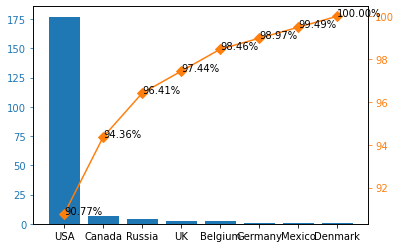

In [7]:
# We don't need to reorder the table because value_counts does this for us.
fig, ax = plt.subplots()
ax.bar(countries.index, countries['Absolute Freq.'], color='C0')
ax2 = ax.twinx()
ax2.plot(countries.index, countries['Cumulative Freq.'], color='C1', marker='D', ms=7)

# Prints the percentages on the graph.
formatted_freqs = ['{:.2f}%'.format(x) for x in countries['Cumulative Freq.']]
for i, txt in enumerate(formatted_freqs):
    ax2.annotate(txt, (countries.index[i], countries['Cumulative Freq.'][i]))

ax.tick_params(axis='y', colors='C0')
ax2.tick_params(axis='y', colors='C1')
plt.show()

**Task 8:** Calculate the mean, median, mode, skewness, variance and standard deviation of Price for all properties, no matter if sold or not.

In [8]:
mean = data['Price'].mean()
mode = data['Price'].mode()[0]
median = np.median(data['Price'])
skew = data['Price'].skew()
variance = np.var(data['Price'])
std_dev = np.std(data['Price'])

print('Mean: {} \nMode: {} \nMedian: {} \nSkew: {} \nVariance: {} \nStandard Deviation: {}'.format(mean, mode, median, skew, variance, std_dev))

Mean: 281171.9013857678 
Mode: 460001.26 
Median: 249075.66 
Skew: 1.096014932145483 
Variance: 7912471594.835338 
Standard Deviation: 88952.0747078748


**Task 9:** Interpret the measures.

Whilst the mean is only 281K, most properties are valued at 460K. This may be an outlier however, as the mean and median are relatively close in value.
There's a positive skew, telling us that more low-values properties exist (this is backed up in the previous graphs).

**Task 10:** Calculate the covariance and correlation coefficient between Price and Area, no matter if the property is sold or not. Is the result in line with the scatter plot?

In [9]:
covariance = 0
price_mean = data['Price'].mean()
area_mean = data['Area (ft.)'].mean()

for i, row in data.iterrows():
    covariance += (row['Price'] - price_mean) * (row['Area (ft.)'] - area_mean)
    
covariance /= data['Price'].size - 1

print('Covariance: {}'.format(covariance))

price_variance = 0
area_variance = 0

for i in data['Price']:
    price_variance += math.pow((i - price_mean), 2)

price_variance /= data['Price'].size - 1
pr_std_dev = math.sqrt(price_variance)

for i in data['Area (ft.)']:
    area_variance += math.pow((i - area_mean), 2)

area_variance /= data['Area (ft.)'].size - 1
ar_std_dev = math.sqrt(area_variance)

coeff = covariance / (pr_std_dev * ar_std_dev)
print('Coefficient of Correlation: {}'.format(coeff))

Covariance: 24147707.28908277
Coefficient of Correlation: 0.951087333679036


Coeffiencient is in line with the scatter plot as it is nearly 1, demonstrating a clear positive correlation.